In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [2]:
df = pd.read_csv('data/jiji_car_evaluation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2000 non-null   object 
 1   condition     2000 non-null   object 
 2   transmission  1994 non-null   object 
 3   make          1773 non-null   object 
 4   model         1773 non-null   object 
 5   year          881 non-null    float64
 6   location      2000 non-null   object 
 7   price         2000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 125.1+ KB


In [3]:
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,"₦ 8,850,000"
1,Land Rover Range Rover 2023 Black,foreign used,automatic,Land,Rover,NaN,Idu Industrial,"₦ 365,000,000"
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,NaN,Alimosho,"₦ 7,250,000"
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,NaN,Alimosho,"₦ 11,000,000"
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,NaN,Ogba,"₦ 14,200,000"


In [4]:
df['price'] = (
    df['price']
    .astype(str)
    .str.replace('₦', '', regex=True)
    .str.replace(',', '', regex=True)
    .str.strip()
)
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000
1,Land Rover Range Rover 2023 Black,foreign used,automatic,Land,Rover,NaN,Idu Industrial,365000000
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,NaN,Alimosho,7250000
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,NaN,Alimosho,11000000
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,NaN,Ogba,14200000


In [5]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [6]:
df = df[(df['price'] >= 500_000) & (df['price'] <= 100_000_000)]
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,NaN,Alimosho,7250000
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,NaN,Alimosho,11000000
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,NaN,Ogba,14200000
5,Kia Sportage SX 4dr SUV AWD (2.0L 4cyl Turbo 6...,foreign used,automatic,Kia,Sportage,NaN,Apapa,28500000


In [7]:
df.isnull().sum()

title              0
condition          0
transmission       6
make             212
model            212
year            1087
location           0
price              0
dtype: int64

In [8]:
df['year'] = df['year'].fillna(round(df['year'].mean()))
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,2008.0,Alimosho,7250000
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,2008.0,Alimosho,11000000
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,2008.0,Ogba,14200000
5,Kia Sportage SX 4dr SUV AWD (2.0L 4cyl Turbo 6...,foreign used,automatic,Kia,Sportage,2008.0,Apapa,28500000


In [9]:
df = df.dropna(subset=['make', 'model', 'transmission'])

In [10]:
df.isnull().sum()

title           0
condition       0
transmission    0
make            0
model           0
year            0
location        0
price           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1747 non-null   object 
 1   condition     1747 non-null   object 
 2   transmission  1747 non-null   object 
 3   make          1747 non-null   object 
 4   model         1747 non-null   object 
 5   year          1747 non-null   float64
 6   location      1747 non-null   object 
 7   price         1747 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 122.8+ KB


In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

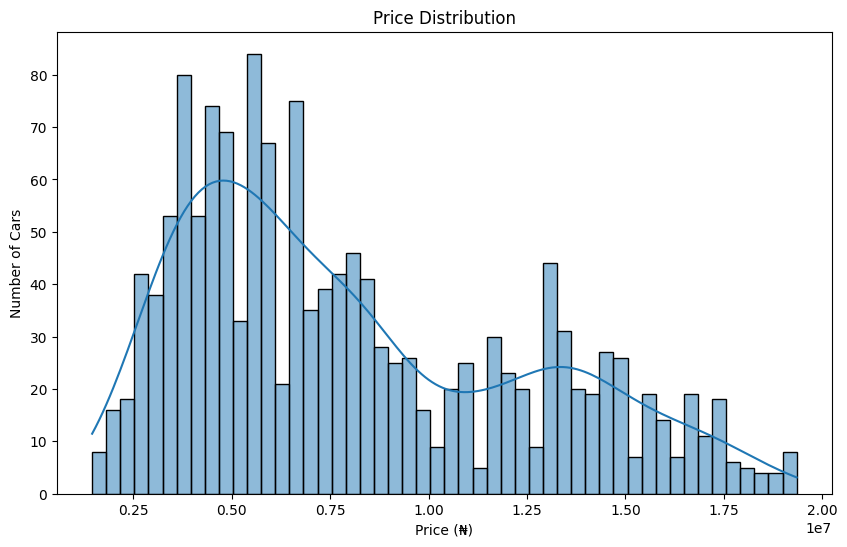

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (₦)')
plt.ylabel('Number of Cars')
plt.show()

In [14]:
avg_price_by_make = df.groupby('make')['price'].mean().sort_values(ascending=False)
avg_price_by_make

make
ZX            1.750000e+07
JMC           1.650000e+07
Scion         1.630000e+07
New           1.625000e+07
Mini          1.290000e+07
Lincoln       1.210000e+07
GMC           1.210000e+07
Hyundai       1.067866e+07
Lexus         9.900825e+06
Audi          9.487500e+06
Toyota        9.146233e+06
Dodge         8.900000e+06
Land          8.474111e+06
Acura         8.386625e+06
BMW           8.304211e+06
Mitsubishi    8.151429e+06
Ford          7.991775e+06
Chevrolet     7.704545e+06
Cadillac      7.500000e+06
Chrysler      7.333333e+06
Kia           6.818287e+06
Rover         6.800000e+06
Nissan        6.565152e+06
Pontiac       6.466667e+06
Jeep          6.381250e+06
Infiniti      6.321750e+06
Mazda         6.319680e+06
Volvo         6.026367e+06
Honda         5.817773e+06
Gonow         5.580000e+06
Subaru        5.575000e+06
Volkswagen    4.724343e+06
Peugeot       4.543821e+06
Changan       4.500000e+06
Opel          3.900000e+06
Daihatsu      2.700000e+06
Brilliance    2.035000e

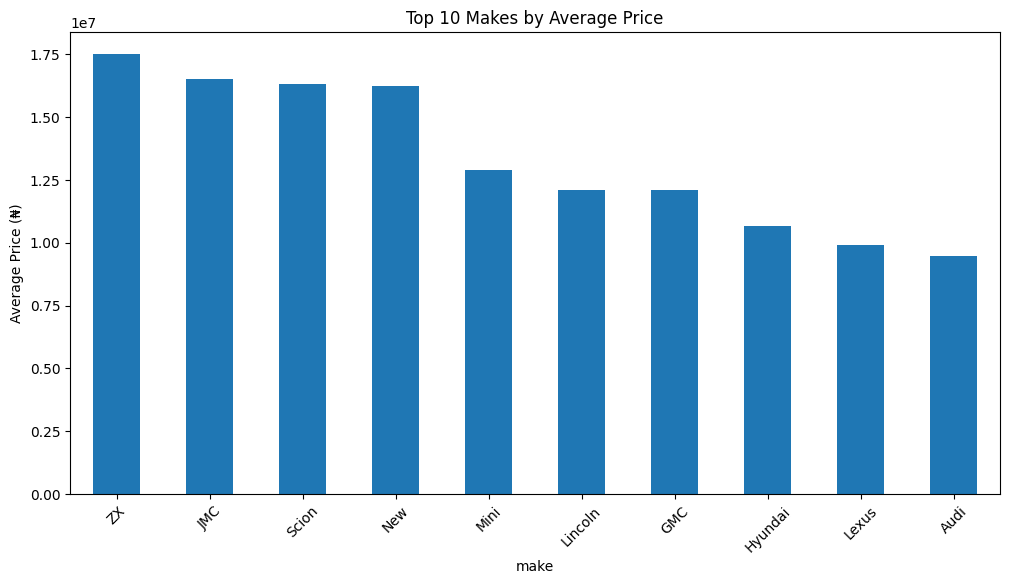

In [15]:
plt.figure(figsize=(12, 6))
avg_price_by_make[:10].plot(kind='bar')
plt.title('Top 10 Makes by Average Price')
plt.ylabel('Average Price (₦)')
plt.xticks(rotation=45)
plt.show()

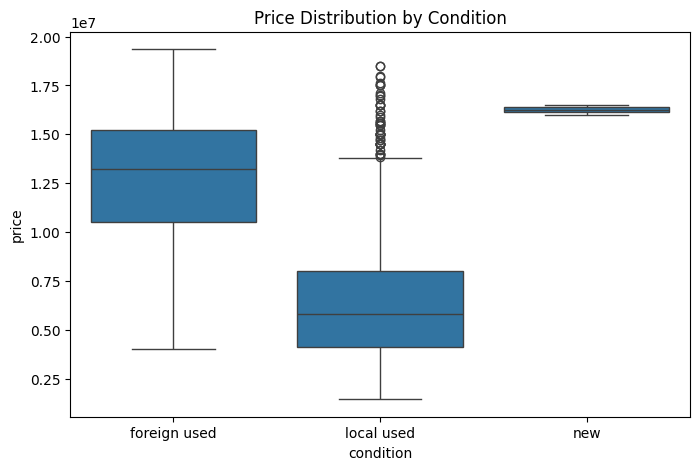

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Condition')
plt.show()

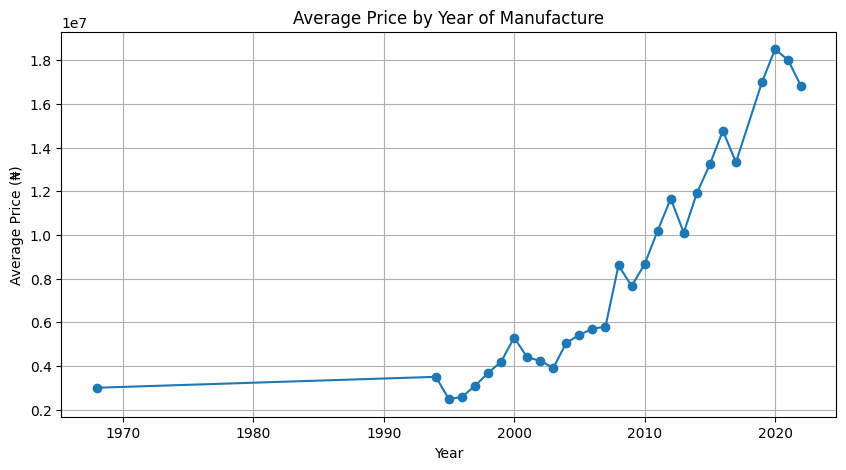

In [17]:
df['year'] = df['year'].astype(int)

# Group by year
avg_price_by_year = df.groupby('year')['price'].mean()

# Plot
plt.figure(figsize=(10, 5))
avg_price_by_year.plot(marker='o')
plt.title('Average Price by Year of Manufacture')
plt.ylabel('Average Price (₦)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


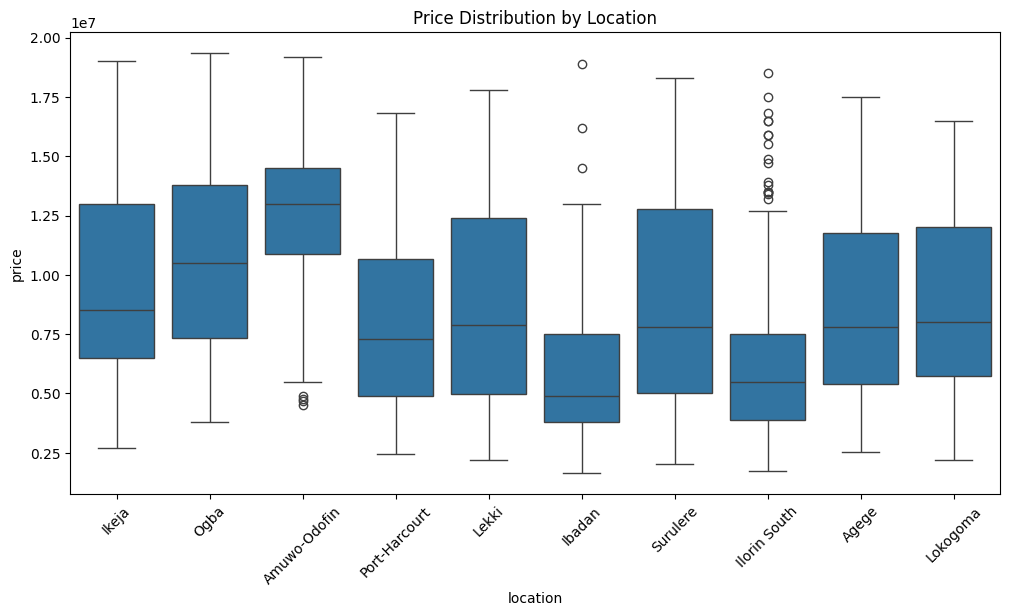

In [18]:
top_locations = df['location'].value_counts().head(10).index
df_top_locations = df[df['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='price', data=df_top_locations)
plt.title('Price Distribution by Location')
plt.xticks(rotation=45)
plt.show()


In [19]:
correlation = df[['year', 'price']].corr()
print(correlation)

         year   price
year   1.0000  0.4412
price  0.4412  1.0000


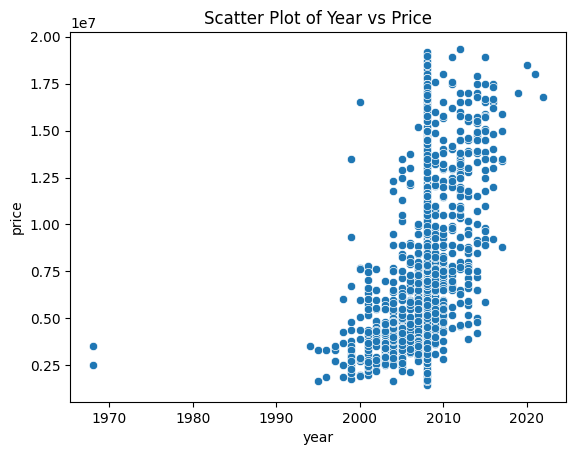

In [20]:
sns.scatterplot(x='year', y='price', data=df)
plt.title("Scatter Plot of Year vs Price")
plt.show()

In [21]:
avg_price_by_year = df_filtered.groupby('year')['price'].mean()
avg_price_by_year.plot(marker='o', figsize=(10,5))
plt.title("Average Car Price by Year")
plt.ylabel("Price (₦)")
plt.grid(True)
plt.show()


NameError: name 'df_filtered' is not defined

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select relevant features
features = ['year', 'make', 'model', 'condition', 'transmission', 'location']
target = 'price'

df_multi = df.dropna(subset=features + [target])

X = df_multi[features]
y = df_multi[target].astype(float)

# Preprocessing: one-hot encode categorical columns
categorical_features = ['make', 'model', 'condition', 'transmission', 'location']
# numeric_features = ['year']
for col in categorical_features:
    X[col] = X[col].astype(str)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep 'year' as-is
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate
print("R2 Score:", r2_score(y, y_pred))
print("RMSE:", mean_squared_error(y, y_pred))
print("RMAE:", mean_absolute_error(y, y_pred))

R2 Score: 0.7436911744835633
RMSE: 4797959133553.602
RMAE: 1563559.4677087755


C:\Users\ola-dev\AppData\Local\Temp\ipykernel_8728\1833422896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
C:\Users\ola-dev\AppData\Local\Temp\ipykernel_8728\1833422896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
C:\Users\ola-dev\AppData\Local\Temp\ipykernel_8728\1833422896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

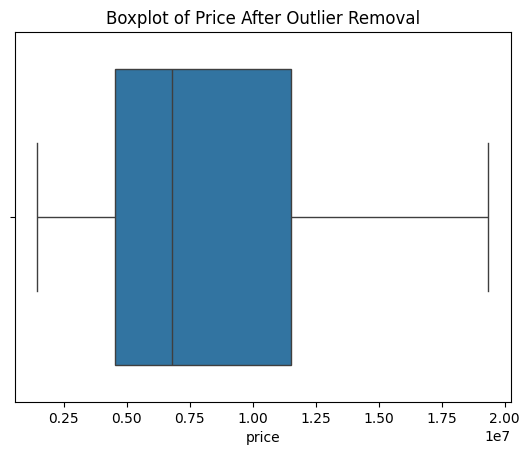

In [26]:
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price After Outlier Removal")
plt.show()

In [27]:
print("Max price:", df['price'].max())

Max price: 19350000


In [28]:
print("Max price:", df['price'].min())

Max price: 1450000


In [ ]:
# Create an empty DataFrame to store cleaned data
cleaned_df = pd.DataFrame()

# For 'New' condition
new_cars = df[df['condition'] == 'New']
Q1 = new_cars['price'].quantile(0.25)
Q3 = new_cars['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_cars_clean = new_cars[(new_cars['price'] >= lower_bound) & (new_cars['price'] <= upper_bound)]

# For 'Foreign Used' condition
foreign_cars = df[df['condition'] == 'Foreign Used']
Q1 = foreign_cars['price'].quantile(0.25)
Q3 = foreign_cars['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
foreign_cars_clean = foreign_cars[(foreign_cars['price'] >= lower_bound) & (foreign_cars['price'] <= upper_bound)]

# For 'Local Used' condition
local_cars = df[df['condition'] == 'Local Used']
Q1 = local_cars['price'].quantile(0.25)
Q3 = local_cars['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
local_cars_clean = local_cars[(local_cars['price'] >= lower_bound) & (local_cars['price'] <= upper_bound)]

# Combine all cleaned data
df_cleaned = pd.concat([new_cars_clean, foreign_cars_clean, local_cars_clean], ignore_index=True)
